# 1. Subset Selection Methods

## 1. Best Subset Selection

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('precision', 2)
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20.2f}'.format)

plt.style.use('seaborn')

In [2]:
# load data
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,...,W,632,43,10,475.00,N
-Alvin Davis,479,130,18,66,72,76,...,W,880,82,14,480.00,A
-Andre Dawson,496,141,20,65,78,37,...,E,200,11,3,500.00,N
-Andres Galarraga,321,87,10,39,42,30,...,E,805,40,4,91.50,N
-Alfredo Griffin,594,169,4,74,51,35,...,W,282,421,25,750.00,A


In [3]:
# 우리의 종속변수의 위치를 끝으로 보내주자.

cols_arange = [col for col in hitters if col !=hitters.columns[-2]] + [hitters.columns[-2]]
hitters = hitters[cols_arange]
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,NewLeague,Salary
Player,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,...,W,632,43,10,N,475.00
-Alvin Davis,479,130,18,66,72,76,...,W,880,82,14,A,480.00
-Andre Dawson,496,141,20,65,78,37,...,E,200,11,3,N,500.00
-Andres Galarraga,321,87,10,39,42,30,...,E,805,40,4,N,91.50
-Alfredo Griffin,594,169,4,74,51,35,...,W,282,421,25,A,750.00


In [4]:
# 'League', 'Division', 'NewLeague'는 qualitative 변수이므로 dummy 변수화.

hitters['League']= pd.get_dummies(hitters['League']).iloc[:,0]
hitters['Division']=pd.get_dummies(hitters['Division']).iloc[:,0]
hitters['NewLeague']=pd.get_dummies(hitters['NewLeague']).iloc[:,0]

# X 변수 y 변수 나누기
X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [5]:
k_features = 1
sub = []
reg = []
kft = []

n_features = X.shape[1]

for k_features in range(1,20):
    subsets = chain(combinations(range(n_features), k_features))
    #chain은 list를 연결해주는 것.
    #combinations는 조합을 만들어주는 것. aCb 인 것.
    
    best_score = np.inf
    
    for subset in subsets:
        lin_reg = sm.OLS(y, sm.add_constant(X.iloc[:, list(subset)])).fit()
        score = lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, list(subset)
            best_reg = lin_reg
            
    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(k_features)

results = pd.DataFrame({'kft':kft, 'sub':sub, 'reg':reg},
                       columns = ['sub', 'reg', 'kft']).set_index('kft')

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

KeyboardInterrupt: 

In [5]:
results = pd.read_pickle('results_651')

In [6]:
results

,sub,rss,aic,bic,r2a
kft,,,,,
1,[11],36179679.26,3862.14,3869.28,0.32
2,"[1, 11]",30646559.89,3820.49,3831.20,0.42
3,"[1, 11, 15]",29249296.86,3810.21,3824.50,0.45
4,"[1, 11, 14, 15]",27970851.82,3800.46,3818.32,0.47
5,"[0, 1, 11, 14, 15]",27149899.43,3794.63,3816.06,0.48
...,...,...,...,...,...
15,"[0, 1, 2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, ...",24235177.36,3784.76,3841.91,0.52
16,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",24219377.47,3786.59,3847.31,0.52
17,"[0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 14, 1...",24209446.76,3788.48,3852.78,0.51


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  import sys
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be correcte

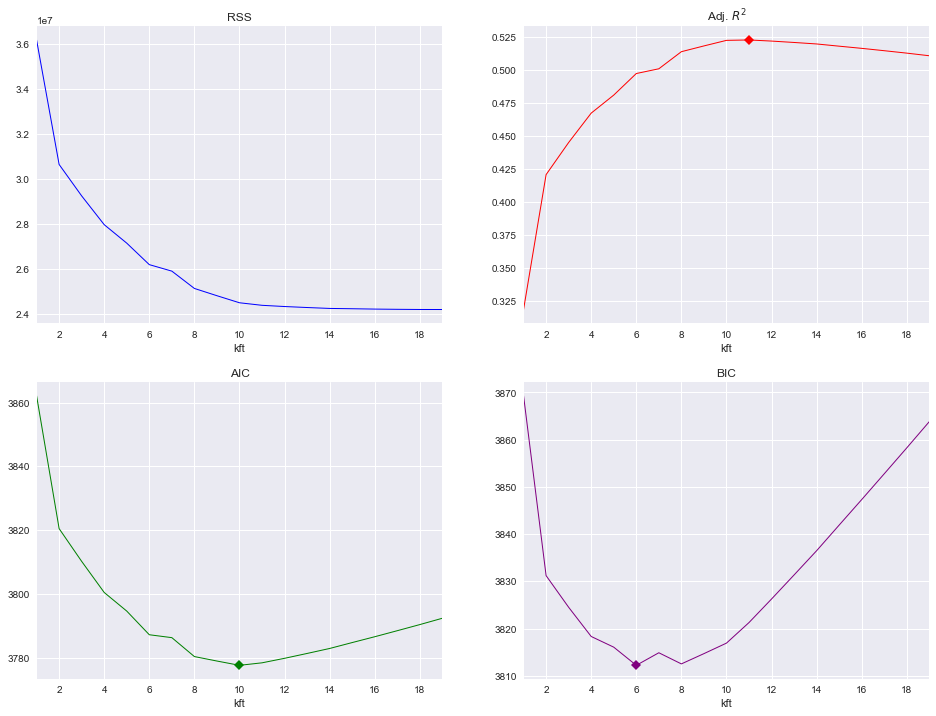

In [7]:
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
results.rss.plot(title='RSS', lw=1, color='blue')

plt.subplot(2, 2, 2)
max_r2a = results.r2a.argmax()-1
results.r2a.plot(title='Adj. $R^2$', markevery=[max_r2a], marker='D', lw=1, color='red')

plt.subplot(2, 2, 3)
min_aic = results.aic.argmin()-1
results.aic.plot(title='AIC', markevery=[min_aic], marker='D', lw=1, color='green')

plt.subplot(2, 2, 4)
min_bic = results.bic.argmin()-1
results.bic.plot(title='BIC', markevery=[min_bic], marker='D', lw=1, color='purple');

In [8]:
print(results['sub'][results.bic.idxmin()])
print(results['sub'][results.aic.idxmin()])
print(results['sub'][results.r2a.idxmax()])

bic_subset = results['sub'][results.bic.idxmin()]
aic_subset = results['sub'][results.aic.idxmin()]
r2a_subset = results['sub'][results.r2a.idxmax()]

#각 수치별로 제일 좋은 부분의 subset을 찾아보자.

[0, 1, 5, 11, 14, 15]
[0, 1, 5, 7, 10, 11, 12, 14, 15, 16]
[0, 1, 5, 7, 10, 11, 12, 13, 14, 15, 16]


In [9]:
#min bic
bic_reg = sm.OLS(y, sm.add_constant(X.iloc[:, bic_subset])).fit()
bic_reg.summary()

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     44.18
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           6.82e-37
Time:                        22:56:07   Log-Likelihood:                -1886.6
No. Observations:                 263   AIC:                             3787.
Df Residuals:                     256   BIC:                             3812.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.4397     64.050     -0.491      0.624    -157.571      94.692
AtBat         -1.8686      0.527     -3.543      0.000      -2.907      -0.830
Hits           7.6044      1.663      4.574      0.000       4.330      10.878
Walks          3.6976      1.210      3.055      0.002       1.314       6.081
CRBI           0.6430      0.064      9.979      0.000       0.516       0.770
Division     122.9515     39.820      3.088      0.002      44.534     201.369
PutOuts        0.2643      0.075      3.535      0.000       0.117       0.412
==============================================================================
Omnibus:                      101.319   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.052
Skew:                           1.411   Prob(JB):                    2.77e-134
Kurtosis:                       9.940   Cond. No.                     2.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#aic의 경우
aic_reg = sm.OLS(y, sm.add_constant(X.iloc[:, aic_subset])).fit()
aic_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     29.64
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           2.80e-37
Time:                        22:56:07   Log-Likelihood:                -1877.8
No. Observations:                 263   AIC:                             3778.
Df Residuals:                     252   BIC:                             3817.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1554     67.111      0.747      0.456     -82.015     182.325
AtBat         -2.1687      0.536     -4.044      0.000      -3.225      -1.112
Hits           6.9180      1.647      4.201      0.000       3.675      10.161
Walks          5.7732      1.585      3.643      0.000       2.652       8.894
CAtBat        -0.1301      0.055     -2.344      0.020      -0.239      -0.021
CRuns          1.4082      0.390      3.607      0.000       0.639       2.177
CRBI           0.7743      0.210      3.694      0.000       0.362       1.187
CWalks        -0.8308      0.264     -3.152      0.002      -1.350      -0.312
Division     112.3801     39.214      2.866      0.005      35.150     189.610
PutOuts        0.2974      0.074      3.995      0.000       0.151       0.444
Assists        0.2832      0.158      1.796      0.074      -0.027       0.594
==============================================================================
Omnibus:                       91.407   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.766
Skew:                           1.288   Prob(JB):                    9.93e-108
Kurtosis:                       9.191   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#r2a의 경우
r2a_reg = sm.OLS(y, sm.add_constant(X.iloc[:, r2a_subset])).fit()
r2a_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     27.07
Date:                Sun, 09 Aug 2020   Prob (F-statistic):           8.93e-37
Time:                        22:56:07   Log-Likelihood:                -1877.2
No. Observations:                 263   AIC:                             3778.
Df Residuals:                     251   BIC:                             3821.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.7168     69.036      0.981      0.328     -68.248     203.681
AtBat         -2.1277      0.537     -3.959      0.000      -3.186      -1.069
Hits           6.9237      1.646      4.206      0.000       3.682      10.166
Walks          5.6203      1.591      3.533      0.000       2.488       8.753
CAtBat        -0.1390      0.056     -2.478      0.014      -0.249      -0.029
CRuns          1.4553      0.393      3.706      0.000       0.682       2.229
CRBI           0.7853      0.210      3.743      0.000       0.372       1.198
CWalks        -0.8229      0.264     -3.121      0.002      -1.342      -0.304
League       -43.1116     39.966     -1.079      0.282    -121.823      35.600
Division     111.1460     39.218      2.834      0.005      33.907     188.385
PutOuts        0.2894      0.075      3.870      0.000       0.142       0.437
Assists        0.2688      0.158      1.700      0.090      -0.043       0.580
==============================================================================
Omnibus:                       88.563   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.516
Skew:                           1.246   Prob(JB):                    6.74e-103
Kurtosis:                       9.060   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. Forward and Backward Stepwise Selection

In [21]:
def processSubset(feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    reg = model.fit()
    RSS = reg.ssr
    return {'model': reg, 'RSS': RSS}

In [22]:
#forward selection 
def forward(predictors):
    remaining_predictors = [p for p in X.columns if p not in predictors]
    #Forward 방법은 남아있는 애들 중에서 하나씩 채워넣는 방법이므로 remaining이 중요
    
    results=[]
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    #남아있는 애들 중 변수들을 하나씩 집어넣어보고 그에 따른 model과 rss 출력
    
    models = pd.DataFrame(results)
    #list를 dataframe으로 만들어주자.
    
    best_model = models.loc[models['RSS'].argmin()]
    #하나씩 집어넣어봤을 때 제일 작은 놈을 택한다.
    
    return best_model

In [23]:
models_forward = pd.DataFrame(columns=['RSS', 'model'])
#RSS와 model을 열로 가지는 빈 dataframe 생성

predictors = []
#우리는 아예 아무것도 없는 상태에서 시작할 것.

for i in range(1, len(X.columns)+1):
    models_forward.loc[i] = forward(predictors)
    predictors = models_forward.loc[i]['model'].model.exog_names

models_forward

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


,RSS,model
1,43213925.91,<statsmodels.regression.linear_model.Regressio...
2,30733054.43,<statsmodels.regression.linear_model.Regressio...
3,29438536.05,<statsmodels.regression.linear_model.Regressio...
4,28260738.94,<statsmodels.regression.linear_model.Regressio...
5,27175382.56,<statsmodels.regression.linear_model.Regressio...
...,...,...
15,24338306.78,<statsmodels.regression.linear_model.Regressio...
16,24319161.16,<statsmodels.regression.linear_model.Regressio...
17,24303650.06,<statsmodels.regression.linear_model.Regressio...
18,24296489.11,<statsmodels.regression.linear_model.Regressio...


In [29]:
# 각 predictor의 개수 상에서 제일 RSS가 작은 model들이 구해진 것.
# 이제 각 model 별 bic 또는 aic를 쭉 나열해서 그 값이 제일 작은 놈을 고르면 된다.

bic_f = []

for m in models_forward.model:
    bic_f.append(m.bic)

print('Number of features:',np.array(bic_f).argmin())
models_forward.model[5].summary()

Number of features: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.789
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              193.1
Date:                Sun, 09 Aug 2020   Prob (F-statistic):                    5.01e-85
Time:                        23:03:25   Log-Likelihood:                         -1891.4
No. Observations:                 263   AIC:                                      3793.
Df Residuals:                     258   BIC:                                      3811.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Hits           7.4440      1.590      4.683      0.000       4.314      10.574
CRBI           0.6840      0.063     10.848      0.000       0.560       0.808
PutOuts        0.2884      0.075      3.833      0.000       0.140       0.437
AtBat         -1.5717      0.441     -3.563      0.000      -2.440      -0.703
Division     124.0353     38.640      3.210      0.001      47.945     200.125
==============================================================================
Omnibus:                       99.001   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.955
Skew:                           1.425   Prob(JB):                    4.56e-114
Kurtosis:                       9.285   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
#backward elimination

def backward(predictors):
    
    results = []
    
    for combo in combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
        #같은 feature 중에서 한 가지 feature만 뺀 모든 경우의 수 고려.
        #즉, feature가 현재 5개라면 4개를 고른다고 했을 때를 모두 고려하는 것.
        #그리고 그 중에서 가장 좋은 애를 고른다면 자동으로 한가지 변수가 빠질 것.
        
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

models_backward = pd.DataFrame(columns=['RSS', 'model'], index=range(1, len(X.columns)))

predictors = X.columns
#이번에는 모두 들어있는 애부터 시작한다.


while(len(predictors)>1):
    models_backward.loc[len(predictors)-1] = backward(predictors)
    #-1이 들어가는 이유는 우리가 위에서 한 가지를 뺐을 때 제일 좋은 애를 고른 것이기 때문
    predictors = models_backward.loc[len(predictors)-1]['model'].model.exog_names

#그런데 여기까지만하면 full model이 빠지므로 full model도 넣어주자.
full = [[sm.OLS(y,X).fit().ssr, sm.OLS(y, X).fit()]]
full_model = pd.DataFrame(full, columns=models_backward.columns,index=['19'])

models_backward = models_backward.append(full_model)

models_backward

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


,RSS,model
1,43213925.91,<statsmodels.regression.linear_model.Regressio...
2,31300217.01,<statsmodels.regression.linear_model.Regressio...
3,29639532.98,<statsmodels.regression.linear_model.Regressio...
4,28459155.21,<statsmodels.regression.linear_model.Regressio...
5,27516763.04,<statsmodels.regression.linear_model.Regressio...
...,...,...
15,24338306.78,<statsmodels.regression.linear_model.Regressio...
16,24319161.16,<statsmodels.regression.linear_model.Regressio...
17,24303650.06,<statsmodels.regression.linear_model.Regressio...
18,24296489.11,<statsmodels.regression.linear_model.Regressio...


In [73]:
#마찬가지로 bic가 제일 작은 애를 찾아보자.

bic_b = []

for m in models_backward.model:
    bic_b.append(m.bic)
    
print('Number of features:',np.array(bic_b).argmin())
models_forward.model[np.array(bic_b).argmin()].summary()

Number of features: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              145.1
Date:                Sun, 09 Aug 2020   Prob (F-statistic):                    2.54e-85
Time:                        23:37:37   Log-Likelihood:                         -1885.3
No. Observations:                 263   AIC:                                      3785.
Df Residuals:                     256   BIC:                                      3810.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AtBat         -2.0202      0.455     -4.443      0.000      -2.916      -1.125
Hits           6.8394      1.593      4.293      0.000       3.702       9.977
Walks          6.0794      1.526      3.983      0.000       3.074       9.085
CRuns          1.1323      0.198      5.711      0.000       0.742       1.523
CWalks        -0.7225      0.262     -2.756      0.006      -1.239      -0.206
Division     114.3780     38.087      3.003      0.003      39.374     189.382
PutOuts        0.3021      0.074      4.063      0.000       0.156       0.449
==============================================================================
Omnibus:                      102.999   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              599.301
Skew:                           1.456   Prob(JB):                    7.30e-131
Kurtosis:                       9.798   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
#개수를 정해주면 model을 뽑아내주는 module도 있다.

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression as LR

sfs = SFS(LR(),
         k_features=5, #변수의 개수 선택
         forward=True, #Backward인 경우 False
         floating=False,
         scoring='r2',  #여기서 Scoring은 r2밖에 못 씀.
         cv = 0)
sfs.fit(X, y) #여기서는 X를 먼저 써준다.
sfs.k_feature_names_

('AtBat', 'Hits', 'CRBI', 'Division', 'PutOuts')

## 3. Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=3)
#Validation Set Approach 이므로 test_size = 0.5

In [84]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    model = sm.OLS(y_train, X_train[list(feature_set)])
    reg = model.fit()
    RSS = reg.ssr
    return {'model':reg, 'RSS': RSS}

In [85]:
def forward(predictors, X_train, y_train, X_test, y_test):
    
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    return best_model

In [86]:
models_train = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
    predictors = models_train.loc[i]['model'].model.exog_names

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':


In [87]:
models_train

,RSS,model
1,21325423.77,<statsmodels.regression.linear_model.Regressio...
2,17703111.37,<statsmodels.regression.linear_model.Regressio...
3,16751534.87,<statsmodels.regression.linear_model.Regressio...
4,15773115.74,<statsmodels.regression.linear_model.Regressio...
5,14621045.95,<statsmodels.regression.linear_model.Regressio...
...,...,...
15,12894320.91,<statsmodels.regression.linear_model.Regressio...
16,12802990.11,<statsmodels.regression.linear_model.Regressio...
17,12731916.30,<statsmodels.regression.linear_model.Regressio...
18,12564202.89,<statsmodels.regression.linear_model.Regressio...


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  after removing the cwd from sys.path.


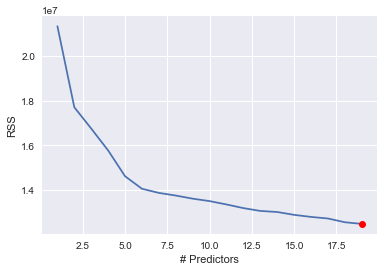

In [88]:
plt.plot(models_train['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train['RSS'].argmin(), models_train['RSS'].min(), 'or');

In [89]:
models_full = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,20):    
    models_full.loc[i] = forward(predictors, X, y, X, y)
    predictors = models_full.loc[i]['model'].model.exog_names

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':


In [90]:
print(models_train.loc[10, 'model'].model.exog_names)
print(models_full.loc[10, 'model'].model.exog_names)

['Walks', 'CHits', 'CAtBat', 'CHmRun', 'Division', 'CWalks', 'Errors', 'CRuns', 'PutOuts', 'League']
['Hits', 'CRBI', 'PutOuts', 'AtBat', 'Division', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists']
